<a href="https://colab.research.google.com/github/CROCODILE888/Codveda-Data-Science-Internship-Tasks/blob/main/Data_Cleaning_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
# Dropping name and ticket as they are not relevant and dropping Cabin as it has many (over 50%) missing values
# inplace = True - updates the df itself, if we don't use it, it will create a copy and update it eg. new_df = df.drop(['Name'], axis = 1)
# axis = 1 refers to columns axis = 0 refers to rows
df.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
# Term	            Meaning	                        Use When...
# Mean (average)	  Total sum ÷ number of values	  Data is numeric & symmetrical (no big outliers)
# Median	          Middle value in sorted data	    Data is numeric & has outliers or skew
# Mode	            Most frequent value	            Data is categorical or discrete

# Data Type Preferred         Measure	  Why
# Numerical (clean)	          Mean	    Easy and accurate average
# Numerical (with outliers)	  Median	  Not affected by extreme values
# Categorical	                Mode	    Only logical option (e.g., Gender, City)

# Using Median as some very old people (outliers) throw the mean off
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-8-1722913953.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
# Categorical data and only 2 missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-10-1904219228.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [12]:
# Verify programmatically that all missing values are handled
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


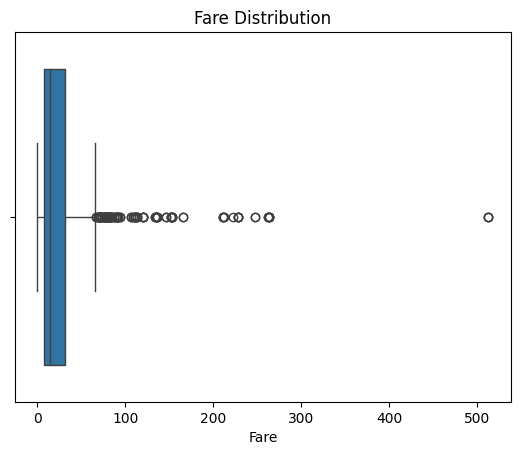

In [13]:
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution')
plt.show()

In [14]:
# IQR = Interquartile Range = Q3 - Q1
# Q1 = 25th percentile (first quartile)
# Q3 = 75th percentile (third quartile)

# An observation is considered an outlier if:
# value < Q1 - 1.5 * IQR  or  value > Q3 + 1.5 * IQR

# Outlier detection for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3-Q1
print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}\n')

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Q1: 7.9104, Q3: 31.0, IQR: 23.0896

Lower Bound: -26.724, Upper Bound: 65.6344


In [15]:
# Creates a boolean Series: (filter) True if value is above the lower and below the upper cutoff.
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

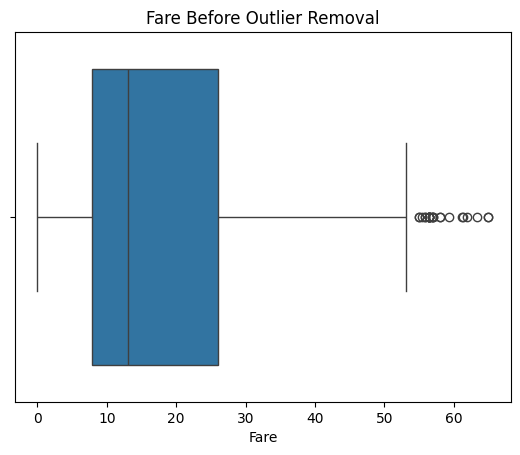

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,775.000000,775.000000,775.00000,775,775.000000,775.000000,775.000000,775.000000,775
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,531,NaN,NaN,NaN,NaN,584
mean,445.806452,0.339355,2.48000,NaN,28.748710,0.437419,0.340645,17.822091,NaN
std,260.116285,0.473796,0.73439,NaN,12.782123,0.899838,0.785914,13.578085,NaN
min,1.000000,0.000000,1.00000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,213.500000,0.000000,2.00000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,450.000000,0.000000,3.00000,NaN,28.000000,0.000000,0.000000,13.000000,NaN
75%,670.500000,1.000000,3.00000,NaN,34.000000,1.000000,0.000000,26.000000,NaN


In [16]:
# Verify if outliers were filtered out or not
sns.boxplot(x=df['Fare'])
plt.title('Fare Before Outlier Removal')
plt.show()

df.describe(include = 'all')

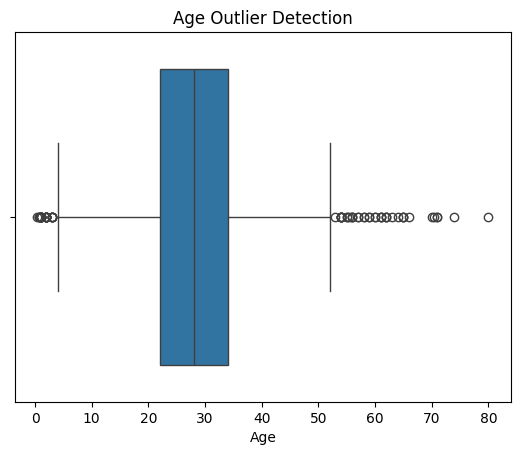

In [17]:
sns.boxplot(x=df['Age'])
plt.title('Age Outlier Detection')
plt.show()

In [18]:
# Outlier detection for Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}\n')

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Q1: 22.0, Q3: 34.0, IQR: 12.0

Lower Bound: 4.0, Upper Bound: 52.0


In [19]:
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

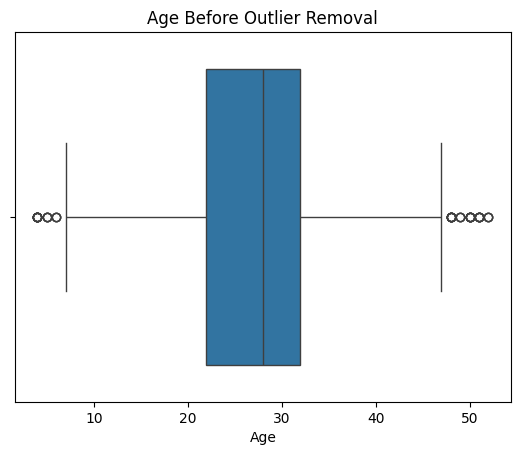

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,708.000000,708.000000,708.000000,708,708.00000,708.000000,708.000000,708.000000,708
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,482,NaN,NaN,NaN,NaN,534
mean,449.714689,0.331921,2.518362,NaN,28.05226,0.399718,0.313559,17.135092,NaN
std,260.208426,0.471236,0.714332,NaN,9.50620,0.840859,0.782038,13.414455,NaN
min,1.000000,0.000000,1.000000,NaN,4.00000,0.000000,0.000000,0.000000,NaN
25%,219.500000,0.000000,2.000000,NaN,22.00000,0.000000,0.000000,7.879200,NaN
50%,450.500000,0.000000,3.000000,NaN,28.00000,0.000000,0.000000,11.241700,NaN
75%,676.250000,1.000000,3.000000,NaN,32.00000,1.000000,0.000000,25.496900,NaN


In [20]:
# Verify if outliers were filtered out or not
sns.boxplot(x=df['Age'])
plt.title('Age Before Outlier Removal')
plt.show()

df.describe(include = 'all')

In [29]:
# df['Embarked'].value_counts()
# 	count
# Embarked
# S	534
# C	103
# Q	71

# dtype: int64

# df['Embarked'].nunique()
# 3

# df['Embarked'].unique()
# array(['S', 'Q', 'C'], dtype=object)

,count
Embarked,
S,534
C,103
Q,71


In [32]:
# Encoding
# | Type                 | When to Use                                                  | Output                                   |
# | -------------------- | ------------------------------------------------------------ | ---------------------------------------- |
# | **Label Encoding**   | When categories have **order** (e.g., Low, Medium, High)     | Each category → number (e.g., 0, 1, 2)   |
# | **One-Hot Encoding** | When categories have **no order** (like `Sex`, `Embarked`)   | Each category → separate column (0 or 1) |

# With drop_first=True, one category becomes the "base"
# If we drop Embarked_C, then:

# Rows with Embarked_Q = 0 and Embarked_S = 0 must be C

df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)

df_encoded.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,28.0,0,0,8.4583,1,1,0
8,9,1,3,27.0,0,2,11.1333,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,0,0
10,11,1,3,4.0,1,1,16.7000,0,0,1
12,13,0,3,20.0,0,0,8.0500,1,0,1
13,14,0,3,39.0,1,5,31.2750,1,0,1


In [45]:
# Normalization and Standardaization

# | Method              | Formula                      | Output Range      | Use When…                                                              |
# | ------------------- | ---------------------------- | ----------------- | ---------------------------------------------------------------------- |
# | **Normalization**   | `(x - min) / (max - min)`    | \[0, 1]           | When scale must be bounded (e.g., ML algorithms like KNN, neural nets) |
# | **Standardization** | `(x - mean) / std deviation` | Mean = 0, Std = 1 | When you expect Gaussian distribution (e.g., linear models, PCA)       |

# WHY do we need to scale data at all?
# In real-world datasets like Titanic, numeric columns can be on very different scales:
# | Feature | Value Range |
# | ------- | ----------- |
# | Age     | \~0 to 80   |
# | Fare    | \~0 to 500  |
# | SibSp   | 0 to 8      |
# | Parch   | 0 to 6      |

# Some ML models (especially distance-based or gradient-based) are sensitive to feature scales.
# If one feature has a much bigger range, it can dominate the learning.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_normalize= ['Age', 'Fare', 'SibSp', 'Parch']

df_encoded[cols_to_normalize] = scaler.fit_transform(df_encoded[cols_to_normalize])
# We took values and squeezed them into the range [0, 1] — while preserving their relative differences.
df_encoded

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,0.375000,0.2,0.000000,0.111538,1,0,1
2,3,1,3,0.458333,0.0,0.000000,0.121923,0,0,1
3,4,1,1,0.645833,0.2,0.000000,0.816923,0,0,1
4,5,0,3,0.645833,0.0,0.000000,0.123846,1,0,1
5,6,0,3,0.500000,0.0,0.000000,0.130128,1,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.479167,0.0,0.000000,0.200000,1,0,1
887,888,1,1,0.312500,0.0,0.000000,0.461538,0,0,1
888,889,0,3,0.500000,0.2,0.333333,0.360769,0,0,1
889,890,1,1,0.458333,0.0,0.000000,0.461538,1,0,0


In [46]:
df_encoded[cols_to_normalize].describe()

,Age,Fare,SibSp,Parch
count,708.000000,708.000000,708.000000,708.00000
mean,0.501089,0.263617,0.079944,0.05226
std,0.198046,0.206376,0.168172,0.13034
min,0.000000,0.000000,0.000000,0.00000
25%,0.375000,0.121218,0.000000,0.00000
50%,0.500000,0.172949,0.000000,0.00000
75%,0.583333,0.392260,0.200000,0.00000
max,1.000000,1.000000,1.000000,1.00000


In [47]:
df_encoded.to_csv("titanic_cleaned_normalized.csv", index=False)